IMPORTNG ALL OF OUR DEPENDENICES


In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA


LOADING THE IRIS DATA SET

In [ ]:
iris_data = sns.load_dataset('iris')

SEPARATING THE FEATURE MATRICES FROM THE LABEL MATRICES

In [ ]:
X = iris_data.drop('species', axis = 1)
Y = iris_data['species']

NOW WE INITIALISE OUR PRINCIPAL COMPONENT ANALYSIS MODEL  WITH THE HYPERPARAMETER  n_component = 2 MEANING WE WANT THE DATA SET TO BE REDUCED TO A 2D MODEL


In [ ]:
model = PCA(n_components = 2)

TRANING OUR MODEL

In [ ]:
model.fit(X)

PCA(n_components=2)

TRANSFORMING OUR DATA TO 2D


In [ ]:
iris_data2D = model.transform(X)

NOW TO PLOT THE RESULTS WE INSERT THE RESULTS INTO THE ORIGINAL IRIS DATA FRAME AND PLOT THEM USING SEABORNS PLOTTNG FUNC lmplot

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


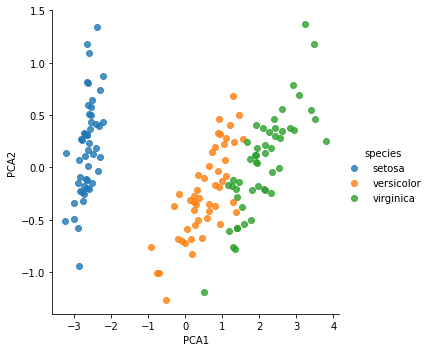

In [ ]:
iris_data['PCA1'] = iris_data2D[:, 0]
iris_data['PCA2'] = iris_data2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue = 'species', data=iris_data,  fit_reg = False)


HERE WE SEE THAT THE 4D DATA IS REPRESENTED FAIRLY WELL IN THIS 2D MODEL

NOW WE WILL BE USING THE ABOVE DATA AND USING THE GAUSSIAN MIXTURE MODEL TO PREDICT CLUSTERING IN THE DATA

In [28]:
from sklearn.mixture import GaussianMixture

WE INITIALIZE OUR MODEL WITH THE RELEVANT HYPERPARAMETERS AND TRAIN IT

In [30]:
model = GaussianMixture(n_components = 3, covariance_type = 'full')
model.fit(X)

GaussianMixture(n_components=3)

WE NOW GIVE IT VALUES TO MAKE PREDICTIONS

In [31]:
Y_gmm = model.predict(X)

WE INSERT THE RESULT INTO OUR ORIGINAL DATA FRAME

In [32]:
iris_data['cluster'] = Y_gmm

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


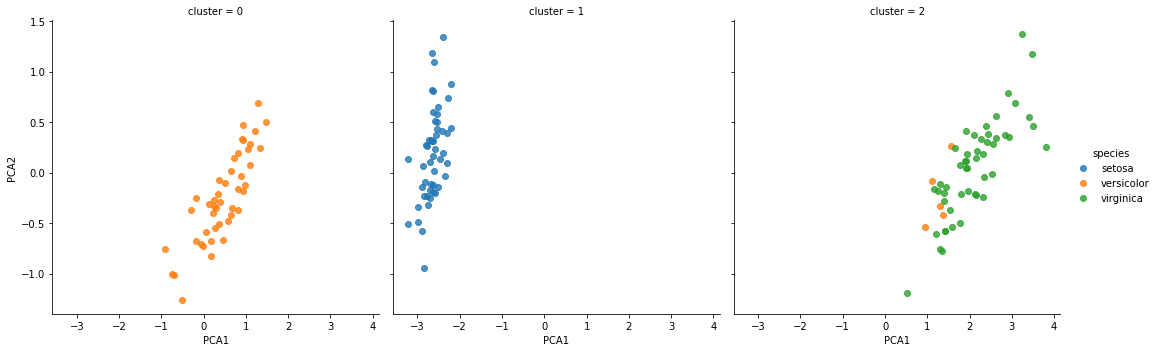

In [33]:
sns.lmplot("PCA1", "PCA2", data = iris_data, hue = 'species', col = 'cluster', fit_reg = False)